**Data Preparation and Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


**Performing EDA**

In [3]:
df.shape

(908, 13)

In [4]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')


In [5]:
print(df.dtypes)

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


**We can see that there are 62 null values in oldpeak column. We fill those with the mean of the column.**

In [8]:
df.fillna(df['oldpeak'].mean(), inplace=True)

Visualizing the distribution of features using **boxplot** and **histograms for numerical data**. Since there are many categorical variables we try not to perform the correlation.

<Axes: >

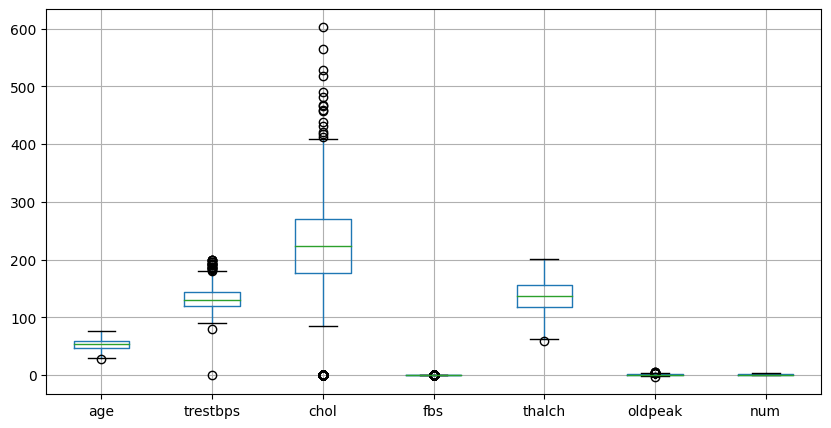

In [9]:
df.boxplot(figsize=(10,5))

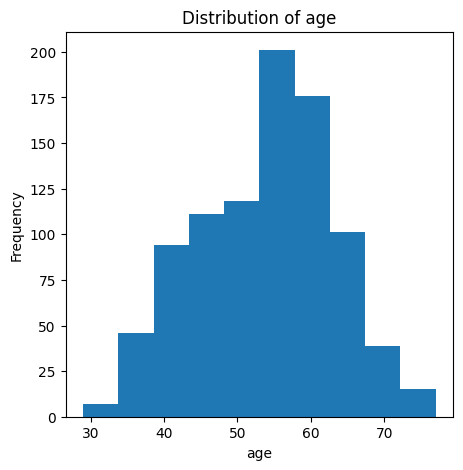

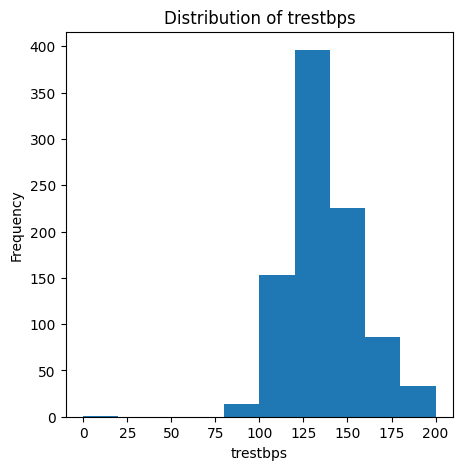

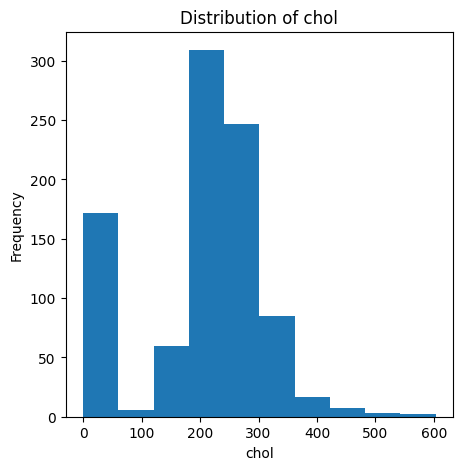

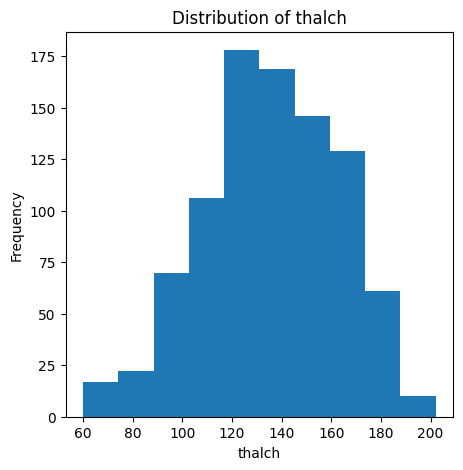

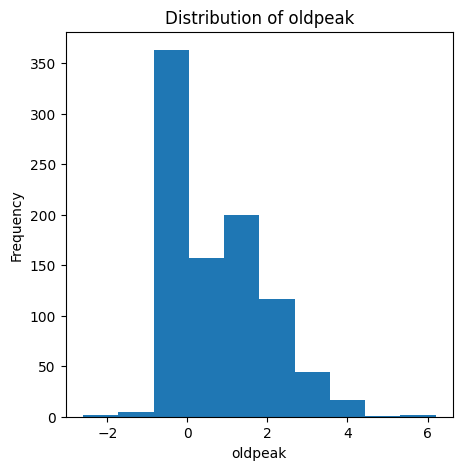

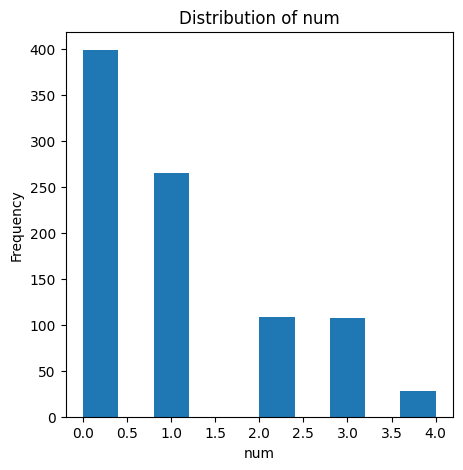

In [45]:
for cols in df.select_dtypes(include=np.number):
  plt.figure(figsize=(5,5))
  plt.hist(df[cols])
  plt.xlabel(cols)
  plt.ylabel("Frequency")
  plt.title(f"Distribution of {cols}")
  plt.show()

In [11]:
x = df.drop('num', axis=1)
y = df['num']

**We will select num column as the target variable. Basically performing the feature extraction.**

In [12]:
print("X type:", type(x))

X type: <class 'pandas.core.frame.DataFrame'>


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

**We split the data into Train and Test data, where training is of 70% and testing is of 30% .**

In [14]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((635, 12), (273, 12), (635,), (273,))

In [15]:
print("X_train type:", type(x_train))
print("X_test type:", type(x_test))

X_train type: <class 'pandas.core.frame.DataFrame'>
X_test type: <class 'pandas.core.frame.DataFrame'>


In [16]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
865,63,Male,non-anginal,130,0,False,st-t abnormality,111,TRUE,0.0,flat,reversable defect
439,58,Male,asymptomatic,170,0,True,st-t abnormality,105,TRUE,0.0,downsloping,normal
342,41,Male,atypical angina,120,291,False,st-t abnormality,160,FALSE,0.0,downsloping,reversable defect
736,61,Male,asymptomatic,146,241,False,normal,148,TRUE,3.0,downsloping,reversable defect
785,54,Male,asymptomatic,110,206,False,lv hypertrophy,108,TRUE,0.0,flat,normal


In [17]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
865,63,Male,non-anginal,130,0,False,st-t abnormality,111,TRUE,0.0,flat,reversable defect
439,58,Male,asymptomatic,170,0,True,st-t abnormality,105,TRUE,0.0,downsloping,normal
342,41,Male,atypical angina,120,291,False,st-t abnormality,160,FALSE,0.0,downsloping,reversable defect
736,61,Male,asymptomatic,146,241,False,normal,148,TRUE,3.0,downsloping,reversable defect
785,54,Male,asymptomatic,110,206,False,lv hypertrophy,108,TRUE,0.0,flat,normal


**Identifying the Categorical and numerical variables.**

In [18]:
cat_cols = ['sex', 'cp', 'restecg', 'fbs', 'exang', 'slope', 'thal']
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

In [19]:
print(cat_cols)
print(num_cols)

['sex', 'cp', 'restecg', 'fbs', 'exang', 'slope', 'thal']
['age', 'trestbps', 'chol', 'thalch', 'oldpeak']


In [20]:
print(type(cat_cols))
print(type(num_cols))

<class 'list'>
<class 'list'>


**After identifying the categorical and numerical variables, We perform the feature engineering techniques for both the categorical and numerical variables.**

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

**We perform OneHotEncoding for the categorical Variables and Scaling for the numerical variables.**

In [22]:
preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), num_cols), ('col', OneHotEncoder(drop='first'), cat_cols)]
)

In [23]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['age', 'trestbps', 'chol', 'thalch',
                                  'oldpeak']),
                                ('col', OneHotEncoder(drop='first'),
                                 ['sex', 'cp', 'restecg', 'fbs', 'exang',
                                  'slope', 'thal'])])

In [24]:
x_train_transformed = preprocessor.fit_transform(x_train)
x_test_transformed = preprocessor.transform(x_test)

**Now we try to build the Decision tree classification model, with the max_depth of 6 (that is, the depth of the tree) and GINI for measure of randomness of the data.**

In [56]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=6, min_samples_split=10, min_samples_leaf=6)
DT.fit(x_train_transformed, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=10,
                       random_state=42)

In [57]:
y_pred = DT.predict(x_test_transformed)

**After building the model, now we try to avaluate the model using accuracy_score, confusion_matrix and classification_report (to find the precision, recall and f1_score).**

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [59]:
accuracy_score(y_test, y_pred)

0.5457875457875457

**We got the accuracy of 51%.**

In [60]:
confusion_matrix(y_test, y_pred)

array([[97, 15,  7,  3,  0],
       [28, 39, 11,  4,  0],
       [ 6, 15,  9,  4,  0],
       [ 8, 14,  2,  4,  0],
       [ 2,  3,  1,  1,  0]])

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74       122
           1       0.45      0.48      0.46        82
           2       0.30      0.26      0.28        34
           3       0.25      0.14      0.18        28
           4       0.00      0.00      0.00         7

    accuracy                           0.55       273
   macro avg       0.34      0.34      0.33       273
weighted avg       0.51      0.55      0.52       273



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


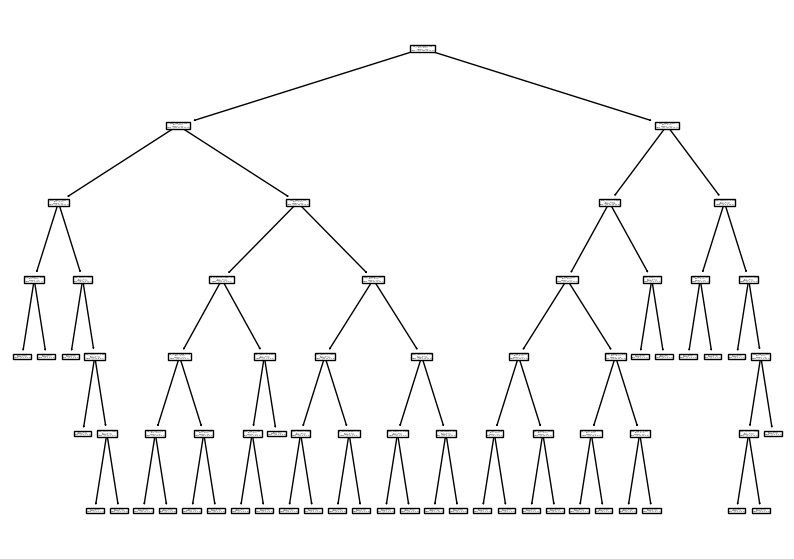

In [62]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(DT, feature_names=preprocessor.get_feature_names_out())
plt.show()

**1.Hyperparameters in the Decision Tree Classifier and it's affect on the Model Performance.**

Hyperparameters in the Decision tree classifier are:

**criterion, max_depth, min_samples_split, min_samples_leaf, max_leaf_node, min_impurity_decrease, random_state**

a.Splitting criteria includes 'gini' and 'entropy'

b.**max_depth:** Controls the tree's overall complexity and can help balance under-fitting and over-fitting.

c.**min_samples_leaf:** Specifies the minimum number of samples required in a leaf.

d.**min_samples_split, max__leaf_node and min_impurity_decrease:** Allows for asymmetric tree growth.


--> Small values of **max_depth, min_samples_split, min_samples_leaf,** or high values of **max_features** can cause underfitting, where the model is too simple to capture the underlying structure.

--> Large values of **max_depth, min_samples_leaf=1**, or considering all features can cause overfitting, where the model captures noise and performs poorly on unseen data.


--> Hyperparameters like **max_depth, max_leaf_nodes, and min_samples_split** control the complexity of the tree.

**2.Difference between label encoding and one hot encoding.**

The main difference between label encoding and one-hot encoding is how they represent categorical data:

**Label encoding:**
Assigns a unique number to each category. This is useful when there's an order to the categories. For example, you might assign 0 to blue, 1 to red, and 2 to green.

**One-hot encoding:**
Creates a binary column for each category, with only one column being "1" for each observation. This is useful for nominal categories, which don't have any order.